# Project 2 -  Modelling with ordinary differential equations

## By Mattis Sørensen, Tore Nygård and Mai-Helen Braathen

### Abstract:

### Introduction:



### Part 1

#### Execise 1.1 :

#### The purpose of trying to model the decline in population as −aN is because a is a positive constant related to the decline in population. The model assumes that as the population size increases, the growth rate decreases, and as the population size decreases, the growth rate increases. The purpose of modeling the decline in population as -a is to create a more realistic representation of population dynamics. The incorporation of the decline in population as -a in the model allows it to capture the idea that population growth is not unlimited but depends on the population's size relative to its carrying capacity.

#### Exercise 1.2 :

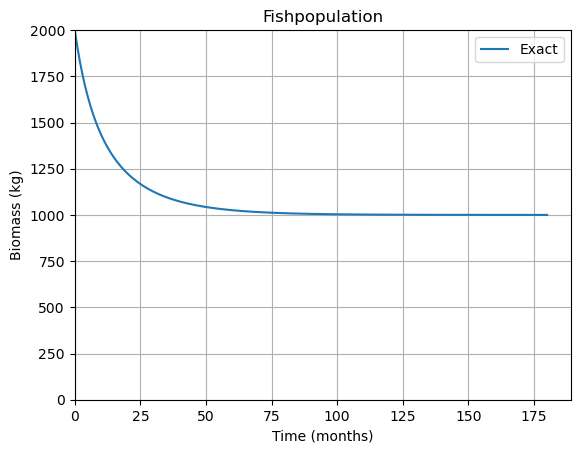

In [1]:
#Exact solution:
import matplotlib.pyplot as plt
import numpy as np
import math

timestep = 1 #Use month as timeunit

starttime = 0
endtime = 12*15 #Number of months that shall be simulated

k = 1000 #kg
r = 0.6/12 #Per month

N0 = 2000 #inital biomass in kg

T1 = []
YExact = []

t =starttime
y = N0

YExact.append(y)
T1.append(t)

while (t<endtime):
    t = t+timestep
    
    y=N0*k/(N0+(k-N0)*math.exp(-r*t)) #exact solution
    T1.append(t)
    YExact.append(y)
    
plt.plot(T1,YExact)
plt.title('Fishpopulation')
plt.xlabel('Time (months)')
plt.ylabel('Biomass (kg)')
plt.ylim(ymin=0,ymax =2000)
plt.xlim(xmin=0)
plt.grid(True)
plt.legend(['Exact'])
plt.show()


In [2]:
# Eulers method: - EKSEMPEL FRA BOKA, MÅ GJØRE OM MED RIKTIGE VERDIER!!! 

def main():
    x=0.0  # Start of integration
    xStop=2.0  # End of integration
    y=np.array([0.0,1.0])  #Initial conditions
    h=0.05  # Step size
    X,Y=integrate(F,x,y,xStop,h)
  #  print(Y)
    yExact = 100.0*X-5.0*X**2+990.0*(np.exp(-0.1*X)-1.0)
    plt.plot(X,Y[:,0],'o',X,yExact,'-')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend(('Numerical','Exact'))
    plt.show()
    
    
def integrate(F,x,y,xStop,h):
    
    # a general function that applies Eulers method. It finds
    # the solution from start to stop and returns the results
    # in arrays.
    
    X=[]
    Y=[]
    X.append(x)
    Y.append(y)
    
    while x<xStop:
        h=min(h,xStop-x)
        y=y+h*F(x,y)
        x=x+h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)

def F(x,y):
    # User specified function that depends on the problem
    F=np.zeros(2)
    F[0]=y[1]
    F[1]=-0.1*y[1]-x
    return F
    

main()    





IndentationError: expected an indented block (2591021245.py, line 24)

In [ ]:
# Fourth order runge kutta method: - EKSEMPEL FRA BOKA MÅ GJØRE OM MED RIKTIGE VERDIER!!!

def main():
    x=0.0  # Start of integration
    xStop=2.0  # End of integration
    y=np.array([0.0,1.0])  #Initial conditions
    h1=0.05  # Step size
    h2=0.2
    X1,Y1=integrate_euler(F,x,y,xStop,h1)
    X2,Y2=integrate_rungk4(F,x,y,xStop,h2)
    YEx = 100*X2-5*X2*X2+990*(np.exp(-0.1*X2)-1)
    
    plt.plot(X1,Y1[:,0],X2,Y2[:,0],'o',X2,YEx)
    plt.legend(['Euler','RungeKutta 4','Exact'])
    plt.grid(True)
    plt.xlabel('x-akse')
    plt.ylabel('y-akse')
    plt.show()
    
    
def integrate_euler(F,x,y,xStop,h):
    
    # a general function that applies Eulers method
    
    X=[]
    Y=[]
    X.append(x)
    Y.append(y)
    
    while x<xStop:
        h=min(h,xStop-x)
        y=y+h*F(x,y)
        x=x+h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)

def integrate_rungk4(F,x,y,xStop,h):
    
    # a general function that applies rungekutta
    
    X=[]
    Y=[]
    X.append(x)
    Y.append(y)
    
    while x<xStop:
        h=min(h,xStop-x)
        y=y + run_kut4(F,x,y,h)
        x=x+h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)


def run_kut4(F,x,y,h):
  #  4th order Runge Kutta Method 
    K0=h*F(x,y)
    K1=h*F(x+0.5*h,y+0.5*K0)
    K2=h*F(x+0.5*h,y+0.5*K1)
    K3=h*F(x+h,y+K2)
    
    return (K0+2*K1+2*K2+K3)/6.0



def F(x,y):
    # User specified function that depends on the problem
    F=np.zeros(2)
    F[0]=y[1]
    F[1]=-0.1*y[1]-x
    return F
    

main()    

### Part 2 – Modelling and Control of the Water Level in a Tank